In [1]:
#importing the required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [2]:
path_loc="C:/Users/DELL/Downloads/archive (3)/IRIS.csv"
iris=pd.read_csv(path_loc)
print("IRIS dataset:")
print(iris.head())

IRIS dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
print("IRIS dataset column names:")
print(iris.columns)

IRIS dataset column names:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
species_names=(iris['species'].unique())
print(species_names)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
iris["species_en"] = iris["species"].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2])
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   species_en  
0           0  
1           0  
2           0  
3           0  
4           0  


In [6]:
print(iris[iris.species_en==1].head())
print(iris[iris.species_en==2].head())

    sepal_length  sepal_width  petal_length  petal_width          species  \
50           7.0          3.2           4.7          1.4  Iris-versicolor   
51           6.4          3.2           4.5          1.5  Iris-versicolor   
52           6.9          3.1           4.9          1.5  Iris-versicolor   
53           5.5          2.3           4.0          1.3  Iris-versicolor   
54           6.5          2.8           4.6          1.5  Iris-versicolor   

    species_en  
50           1  
51           1  
52           1  
53           1  
54           1  
     sepal_length  sepal_width  petal_length  petal_width         species  \
100           6.3          3.3           6.0          2.5  Iris-virginica   
101           5.8          2.7           5.1          1.9  Iris-virginica   
102           7.1          3.0           5.9          2.1  Iris-virginica   
103           6.3          2.9           5.6          1.8  Iris-virginica   
104           6.5          3.0           5.8      

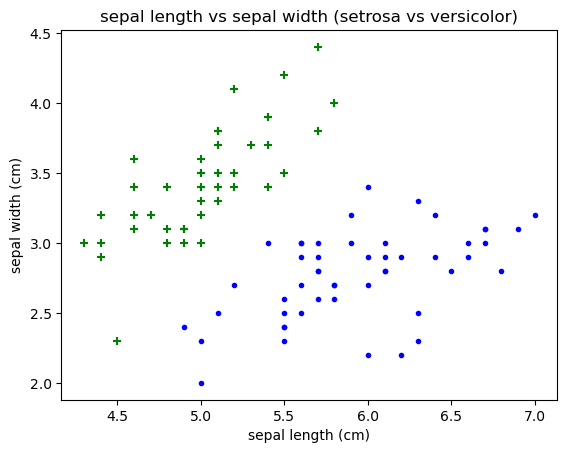

In [7]:
iris0=iris[:50]
iris1=iris[50:100]
iris2=iris[100:]

%matplotlib inline
plt.title('sepal length vs sepal width (setrosa vs versicolor)')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(iris0['sepal_length'],iris0['sepal_width'],color="green",marker='+')
plt.scatter(iris1['sepal_length'],iris1['sepal_width'],color="blue",marker='.')
plt.show()

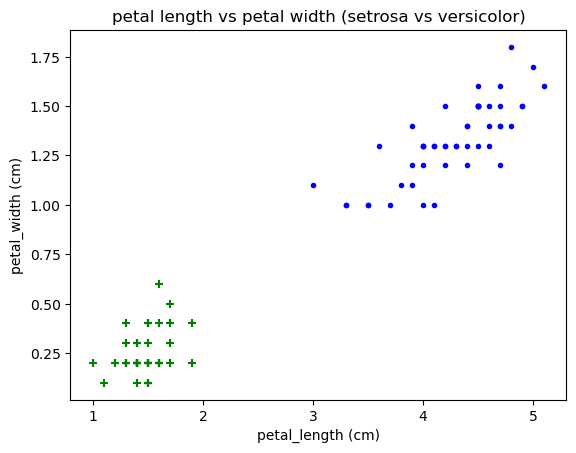

In [8]:
plt.title('petal length vs petal width (setrosa vs versicolor)')
plt.xlabel('petal_length (cm)')
plt.ylabel('petal_width (cm)')
plt.scatter(iris0['petal_length'],iris0['petal_width'],color="green",marker='+')
plt.scatter(iris1['petal_length'],iris1['petal_width'],color="blue",marker='.')
plt.show()

In [9]:
x=iris.drop(['species_en','species'],axis='columns')
y=iris.species_en
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("length of X train data:")
print(len(X_train))
print("length of X test data:")
print(len(X_test))

length of X train data:
120
length of X test data:
30


In [10]:
model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,Y_train)
score=model.score(X_test,Y_test)
print("\nmodel score:",score*100)


model score: 96.66666666666667


In [12]:
Y_pred=model.predict([[6.8,3.0,5.5,1.3]])
species_mapping = {
    0: "Iris-setosa",
    1: "Iris-versicolor",
    2: "Iris-verginica"
}
species_name = [species_mapping[pred] for pred in Y_pred]

print(f"The predicted species is: {Y_pred}-{species_name}")


The predicted species is: [2]-['Iris-verginica']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
